Red neuronal, trabajo curso IA Universidad Nacional de Colombia
Desarrollado por:

Daniel Germán Martínez Muñoz 

Santiago Andrés García Benitez 

Federico Andrés Tibaduiza Avila

    Es un sistema diseñado para reconocer numeros escritos a mano.


In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from funciones import getData, softmax, cost2, y2indicator, error_rate, relu, softmax1

Xt :  (60000, 784) Xv:  (10000, 784)
Yt :  60000 Yv:  10000
Epoca: 0 costo: 1.87803938875845 error: 0.4372
Epoca: 10 costo: 0.7804903779717823 error: 0.225
Epoca: 20 costo: 0.39642040314309124 error: 0.1102
Epoca: 30 costo: 0.2710408263755293 error: 0.0799
Epoca: 40 costo: 0.21368244546002074 error: 0.064
Epoca: 50 costo: 0.18524332197905205 error: 0.0565
Epoca: 60 costo: 0.168090911365275 error: 0.0501
Epoca: 70 costo: 0.1555048774793091 error: 0.0478
Epoca: 80 costo: 0.14646955535613473 error: 0.0446
Epoca: 90 costo: 0.13865191232723356 error: 0.0416
Epoca: 100 costo: 0.13202368179180968 error: 0.0408
Epoca: 110 costo: 0.12664104781325536 error: 0.0384
Epoca: 120 costo: 0.12215701799195544 error: 0.0375
Epoca: 130 costo: 0.11840207544130439 error: 0.0368
Epoca: 140 costo: 0.11532719209622541 error: 0.0356
Epoca: 150 costo: 0.11254477930306586 error: 0.035
Epoca: 160 costo: 0.1099090601085224 error: 0.0346
Epoca: 170 costo: 0.10755985491710282 error: 0.033
Epoca: 180 costo: 0.10552337

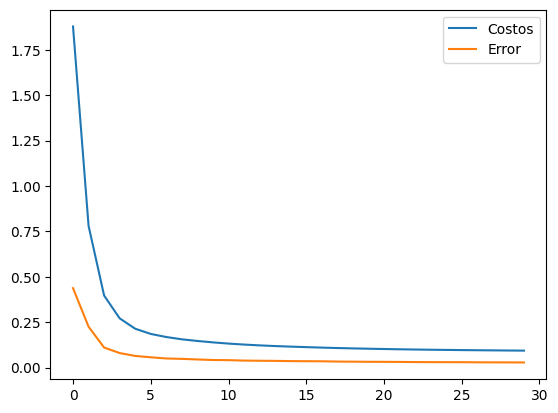

0.9722


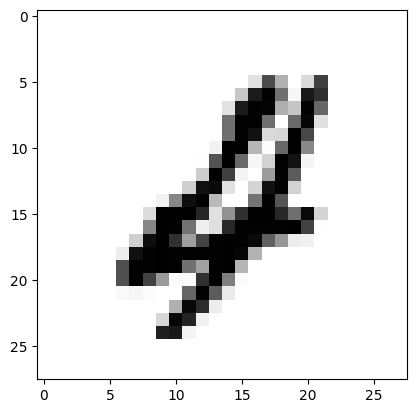

Predicción 0 :  4 Real:  4


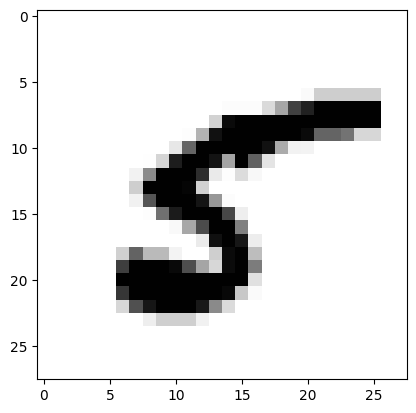

Predicción 1 :  5 Real:  5


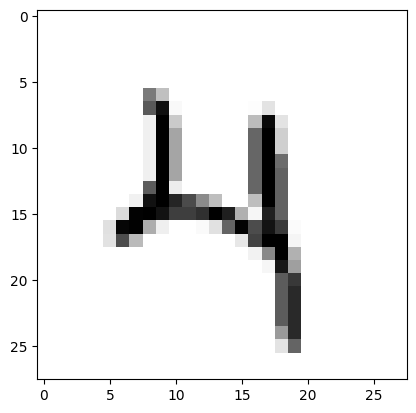

Predicción 2 :  4 Real:  4


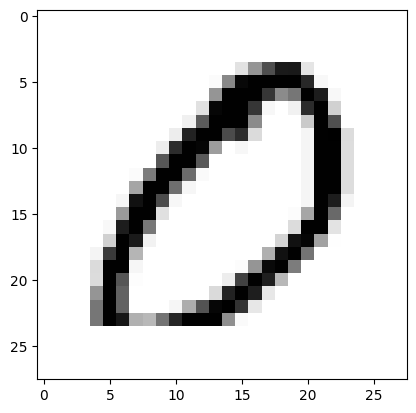

Predicción 3 :  0 Real:  0


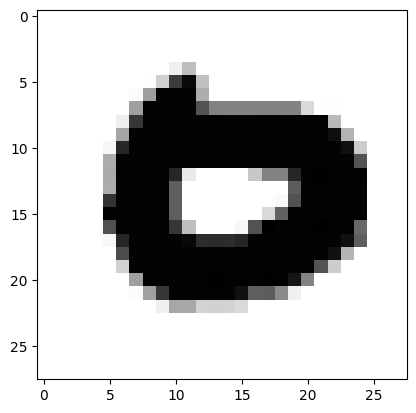

Predicción 4 :  0 Real:  0


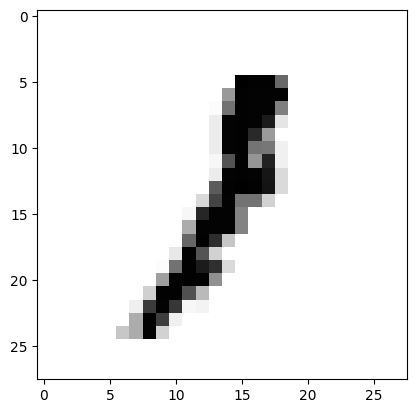

Predicción 5 :  1 Real:  1


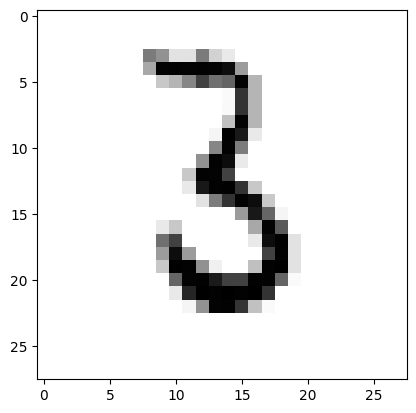

Predicción 6 :  3 Real:  3


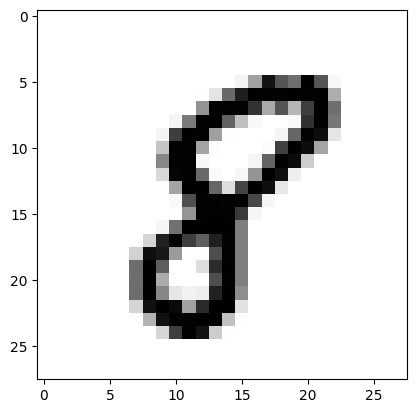

Predicción 7 :  8 Real:  8


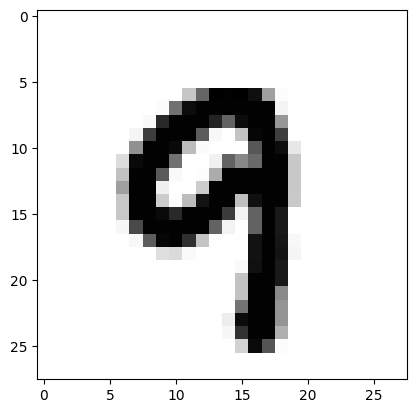

Predicción 8 :  9 Real:  9


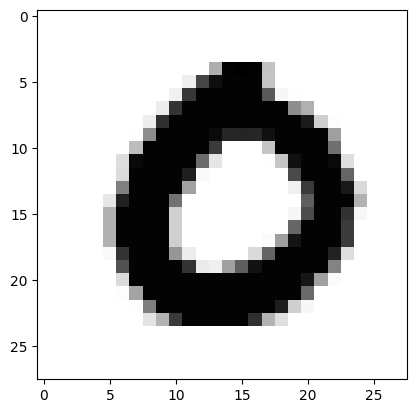

Predicción 9 :  0 Real:  0
Los pesos se escribiran en un archivo .txt ... 


In [2]:
class ANN(object):
    def __init__(self, M): # Numero de neuronas en la capa media.
        self.M = M

    def fit(self, X, Y, Xvalid, Yvalid, fac_aprendizaje=8e-6, reg=1e-7, epochs=300, show_fig=2):

        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M, K) / np.sqrt(self.M)
        self.b2 = np.zeros(K)

        costs = []
        errors = []
        error_mas_bajo = 1
        #inicializar velocidades para el momentum de Nesterov 
        mu = 0.9 
        vW2 = 0
        vb2 = 0
        vW1 = 0
        vb1 = 0
        for i in range(epochs): #Numero de epocas
            # Calculación de las predicción 
            pY, Z = self.forward(X)
            # Decenso de gradiente con el factor de regulacion para evitar el over-fitting
            d3 = pY - T
            gW2 = Z.T.dot(d3) + reg*self.W2
            gb2 = d3.sum(axis=0) + reg*self.b2

            d2 = d3.dot(self.W2.T) * (Z > 0) # (Z > 0) es en boolean que representa la derivada. Esta es solo derivable en el intervalo (0,inf) y su derivda es 1. 
            #calculo de gradinte
            gW1 = X.T.dot(d2) + reg*self.W1
            gb1 = d2.sum(axis=0) + reg*self.b1
            #Actualizo la "velacoidad" (momentum Nesterov)
            vW2 = mu*vW2 - fac_aprendizaje*gW2
            vb2 = mu*vb2 - fac_aprendizaje*gb2
            vW1 = mu*vW1 - fac_aprendizaje*gW1
            vb1 = mu*vb1 - fac_aprendizaje*gb1
            # Actualizo pesos y bias
            self.W2 += mu*vW2 -fac_aprendizaje*gW2
            self.b2 += mu*vb2 -fac_aprendizaje*gb2
            self.W1 += mu*vW1 -fac_aprendizaje*gW1
            self.b1 += mu*vb1 -fac_aprendizaje*gb1
            #Cada 10 epocas calculo el error y el costo con los datos TEST para graficar al final 
            if i % 10 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = cost2(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                errors.append(e)
                print("Epoca:", i, "costo:", c, "error:", e)
                if e < error_mas_bajo:
                    error_mas_bajo = e
        print("Error mas bajo: ", error_mas_bajo)

        if show_fig==2:
            plt.plot(costs, label = "Costos")
            plt.plot(errors, label = "Error")
            plt.legend()
            plt.show()

        elif show_fig==1:
            plt.plot(costs, label = "Costos")
            plt.legend()
            plt.show()

        elif show_fig==0:
            plt.plot(errors, label = "Error")
            plt.legend()
            plt.show()

        return self.W2 , self.W1 , self.b2 , self.b1
    
      #La función forward (hacia adelante) calcula los valores predichos con probabilidades
    def forward(self, X):
        Z = relu(X.dot(self.W1) + self.b1) #Relu para la capa interna y softmax para la de salida
        return softmax(Z.dot(self.W2) + self.b2), Z
    #Obtengo el objeto que tenga la mayor probabilidad, para comparar con la matriz de one-hot. Entran 60.000 imagenes al tiempo.
    def predict(self, X):
        pY, _ = self.forward(X)
        return np.argmax(pY, axis=1)
    #Calcula ue tan bien lo hace.
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)
    #Predice pero recibe como entrada solo una imagen.
    def predict1(self, X ):
        pY, _ = self.forward1(X)
        return np.argmax(pY)
    #Hacia adelante pero con un solo elemento.
    def forward1( self, X ):
        Z = relu(X.dot(self.W1) + self.b1) #Relu para la capa interna y softmax para la de salida.
        return softmax1(Z.dot(self.W2) + self.b2), Z  
    
def main():
    Xtrain, Ytrain, Xvalid, Yvalid = getData()
    print("Xt : " ,Xtrain.shape, "Xv: ",Xvalid.shape, )
    print("Yt : " ,len(Ytrain), "Yv: ",len(Yvalid) )
    model = ANN(200)
    W2 , W1 , b2 , b1 = model.fit(Xtrain, Ytrain, Xvalid, Yvalid, reg=0.0001, show_fig=2) #entreno el sistema show_fig idica que grafica imprimir al final

    print(model.score(Xvalid, Yvalid)) #Calculo que tan bien lo hace.
    #Hago 10 ejemplos
    for i in range(10):
        N , M = Xvalid.shape
        a = np.random.randint(0,N) #Escojo un numero al azar entre 0 - 59.999
        img = Xvalid[a].reshape((28,28)) #Paso de vector a matriz para reconstruir la imagen
        plt.imshow(img, cmap="Greys" )
        str1 = str(i)
        plt.show()
        x = model.predict1(Xvalid[a])
        print("Predicción",str1,": ", x , "Real: " , Yvalid[a])
    print("Los pesos se escribiran en un archivo .txt ... ")
    f = open("Pesos.txt","w")
    s = "W1: " + str(list(W1)) + "\n " + "\n" +  "b1: " + str(b1) 
    f.write(s)
    f.close()
    

if __name__ == '__main__':
    main()